In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [2]:
# import os
# import pandas as pd

# # Root directory containing all subfolders with .wav or .mp4 files
# root_dir = r'/content/drive/MyDrive/audios/Extracted'  # ← change this to your actual path

# # Mappings
# emotion_map = {
#     "01": "Neutral",
#     "02": "Calm",
#     "03": "Happy",
#     "04": "Sad",
#     "05": "Angry",
#     "06": "Fearful",
#     "07": "Disgust",
#     "08": "Surprised"
# }

# intensity_map = {
#     "01": "Normal",
#     "02": "Strong"
# }

# modality_map = {
#     "01": "Audio-Video",
#     "02": "Video-Only",
#     "03": "Audio-Only"
# }

# data = []

# for subdir, _, files in os.walk(root_dir):
#     for file in files:
#         if file.endswith(".wav") or file.endswith(".mp4"):
#             parts = file.split("-")
#             if len(parts) == 7:
#                 modality_code = parts[0]
#                 emotion_code = parts[2]
#                 intensity_code = parts[3]

#                 modality = modality_map.get(modality_code)
#                 emotion = emotion_map.get(emotion_code)
#                 intensity = intensity_map.get(intensity_code)

#                 if modality and emotion and intensity:
#                     full_path = os.path.join(subdir, file)
#                     data.append({
#                         "filename": file,
#                         "emotion": emotion,
#                         "intensity": intensity,
#                         "modality": modality,
#                         "filepath": full_path
#                     })
#                 else:
#                     print(f" Unknown code in: {file}")

# # # Save to CSV
# df = pd.DataFrame(data)
# # df.to_csv("label.csv", index=False)
# # print(f"✅ label.csv generated with {len(df)} entries.")



import os
import pandas as pd

# Root directory containing all subfolders with .wav or .mp4 files
root_dir = r'/content/drive/MyDrive/audios/wav files/Audio_Speech_Actors_01-24'  # ← change this to your actual path

# Mappings
emotion_map = {
    "01": "Neutral",
    "02": "Calm",
    "03": "Happy",
    "04": "Sad",
    "05": "Angry",
    "06": "Fearful",
    "07": "Disgust",
    "08": "Surprised"
}

intensity_map = {
    "01": "Normal",
    "02": "Strong"
}

modality_map = {
    "01": "Audio-Video",
    "02": "Video-Only",
    "03": "Audio-Only"
}

data = []

for subdir, _, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".wav") or file.endswith(".mp4"):
            parts = file.replace(".mp4", "").replace(".wav", "").split("-")
            if len(parts) == 7:
                modality_code = parts[0]
                emotion_code = parts[2]
                intensity_code = parts[3]
                actor_code = parts[6]

                modality = modality_map.get(modality_code)
                emotion = emotion_map.get(emotion_code)
                intensity = intensity_map.get(intensity_code)

                try:
                    actor_id = int(actor_code)
                    gender = "Male" if actor_id % 2 == 1 else "Female"
                except:
                    gender = "Unknown"

                if modality and emotion and intensity:
                    full_path = os.path.join(subdir, file)
                    data.append({
                        "filename": file,
                        "emotion": emotion,
                        "intensity": intensity,
                        "modality": modality,
                        "gender": gender,
                        "actor_id": actor_id,
                        "filepath": full_path
                    })
                else:
                    print(f"Unknown code in: {file}")

# Create DataFrame
df = pd.DataFrame(data)

# Optional: Save to CSV
# df.to_csv("label_with_gender.csv", index=False)
# print(f" label_with_gender.csv generated with {len(df)} entries.")


In [3]:
df

,filename,emotion,intensity,modality,gender,actor_id,filepath
0,03-01-01-01-02-01-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
1,03-01-01-01-01-02-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
2,03-01-01-01-01-01-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
3,03-01-01-01-02-02-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
4,03-01-03-02-02-01-22.wav,Happy,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
...,...,...,...,...,...,...,...
2447,03-02-06-02-02-01-02.wav,Fearful,Strong,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...
2448,03-02-06-01-02-01-02.wav,Fearful,Normal,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...
2449,03-02-06-01-02-02-02.wav,Fearful,Normal,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...
2450,03-02-06-02-01-01-02.wav,Fearful,Strong,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...


In [4]:
modality_counts = df["modality"].value_counts()
print(modality_counts)

modality
Audio-Only    2452
Name: count, dtype: int64


In [5]:
emotions = df["emotion"].value_counts()
print(emotions)

emotion
Happy        376
Fearful      376
Angry        376
Sad          376
Calm         376
Disgust      192
Surprised    192
Neutral      188
Name: count, dtype: int64


In [6]:
print(df["modality"].unique())

['Audio-Only']


In [7]:
# Drop duplicates by emotion (keep first occurrence in sorted order)
sample_df = df.drop_duplicates(subset="emotion", keep="first").reset_index(drop=True)


In [8]:
sample_df

,filename,emotion,intensity,modality,gender,actor_id,filepath
0,03-01-01-01-02-01-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
1,03-01-03-02-02-01-22.wav,Happy,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
2,03-01-06-01-01-02-22.wav,Fearful,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
3,03-01-05-01-01-02-22.wav,Angry,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
4,03-01-04-02-01-02-22.wav,Sad,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
5,03-01-02-02-02-02-22.wav,Calm,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
6,03-01-07-01-01-01-22.wav,Disgust,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...
7,03-01-08-02-01-01-22.wav,Surprised,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...


In [9]:
ipd.Audio(sample_df['filepath'][1])  ## Happy

In [10]:
ipd.Audio(sample_df['filepath'][3])   ## Angry

In [11]:
ipd.Audio(sample_df['filepath'][0])  ## Neutral

In [12]:
## Creating list for all emotions files.
Neutral_file=sample_df['filepath'][0]
Calm_file=sample_df['filepath'][5]
Happy_file=sample_df['filepath'][1]
Sad_file=sample_df['filepath'][4]
Angry_file=sample_df['filepath'][3]
Fearful_file=sample_df['filepath'][2]
Disgust_file=sample_df['filepath'][6]
Surprised_file=sample_df['filepath'][7]
audio=[Neutral_file,Calm_file,Happy_file,Sad_file,Angry_file,Fearful_file,Disgust_file,Surprised_file]

In [13]:
audio

['/content/drive/MyDrive/audios/wav files/Audio_Speech_Actors_01-24/Actor_22 (1)/03-01-01-01-02-01-22.wav',
 '/content/drive/MyDrive/audios/wav files/Audio_Speech_Actors_01-24/Actor_22 (1)/03-01-02-02-02-02-22.wav',
 '/content/drive/MyDrive/audios/wav files/Audio_Speech_Actors_01-24/Actor_22 (1)/03-01-03-02-02-01-22.wav',
 '/content/drive/MyDrive/audios/wav files/Audio_Speech_Actors_01-24/Actor_22 (1)/03-01-04-02-01-02-22.wav',
 '/content/drive/MyDrive/audios/wav files/Audio_Speech_Actors_01-24/Actor_22 (1)/03-01-05-01-01-02-22.wav',
 '/content/drive/MyDrive/audios/wav files/Audio_Speech_Actors_01-24/Actor_22 (1)/03-01-06-01-01-02-22.wav',
 '/content/drive/MyDrive/audios/wav files/Audio_Speech_Actors_01-24/Actor_22 (1)/03-01-07-01-01-01-22.wav',
 '/content/drive/MyDrive/audios/wav files/Audio_Speech_Actors_01-24/Actor_22 (1)/03-01-08-02-01-01-22.wav']

Code to convert .mp4 file into .wav file.

In [14]:
# import os
# import subprocess

# # Converts a .mp4 file to .wav and returns the path to the new .wav file
# def convert_to_wav(input_path):
#     output_path = input_path.replace(".mp4", ".wav")
#     command = [
#         'ffmpeg',
#         '-y',
#         '-i', input_path,
#         '-vn',
#         '-acodec', 'pcm_s16le',
#         '-ar', '22050',
#         '-ac', '1',
#         output_path
#     ]
#     result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

#     if result.returncode != 0:
#         print(f" Failed to convert: {input_path}")
#         print(result.stderr.decode())
#         return None
#     else:
#         print(f" Converted: {output_path}")
#         return output_path

# # Assuming `audio` is your list of .mp4 file paths
# converted_files = []
# for i in range(len(audio)):
#     mp4_file = audio[i]
#     wav_file = convert_to_wav(mp4_file)
#     if wav_file:
#         converted_files.append(wav_file)


In [15]:
# load audio files with librosa
neutral, sr = librosa.load(Neutral_file)
calm, _ = librosa.load(Calm_file)
happy, _ = librosa.load(Happy_file)
sad, _ = librosa.load(Sad_file)
angry, _ = librosa.load(Angry_file)
fearful, _ = librosa.load(Fearful_file)
disgust, _ = librosa.load(Disgust_file)
surprised, _ = librosa.load(Surprised_file)

**Basic information regarding audio files**


In [16]:
neutral.shape

(79460,)

In [17]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [18]:
# total number of samples in audio file
tot_samples = len(neutral)
tot_samples

79460

In [19]:
# duration of "Neutral" audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 3.603628117913832 seconds


## Visualising audio signal in the Temporal domain

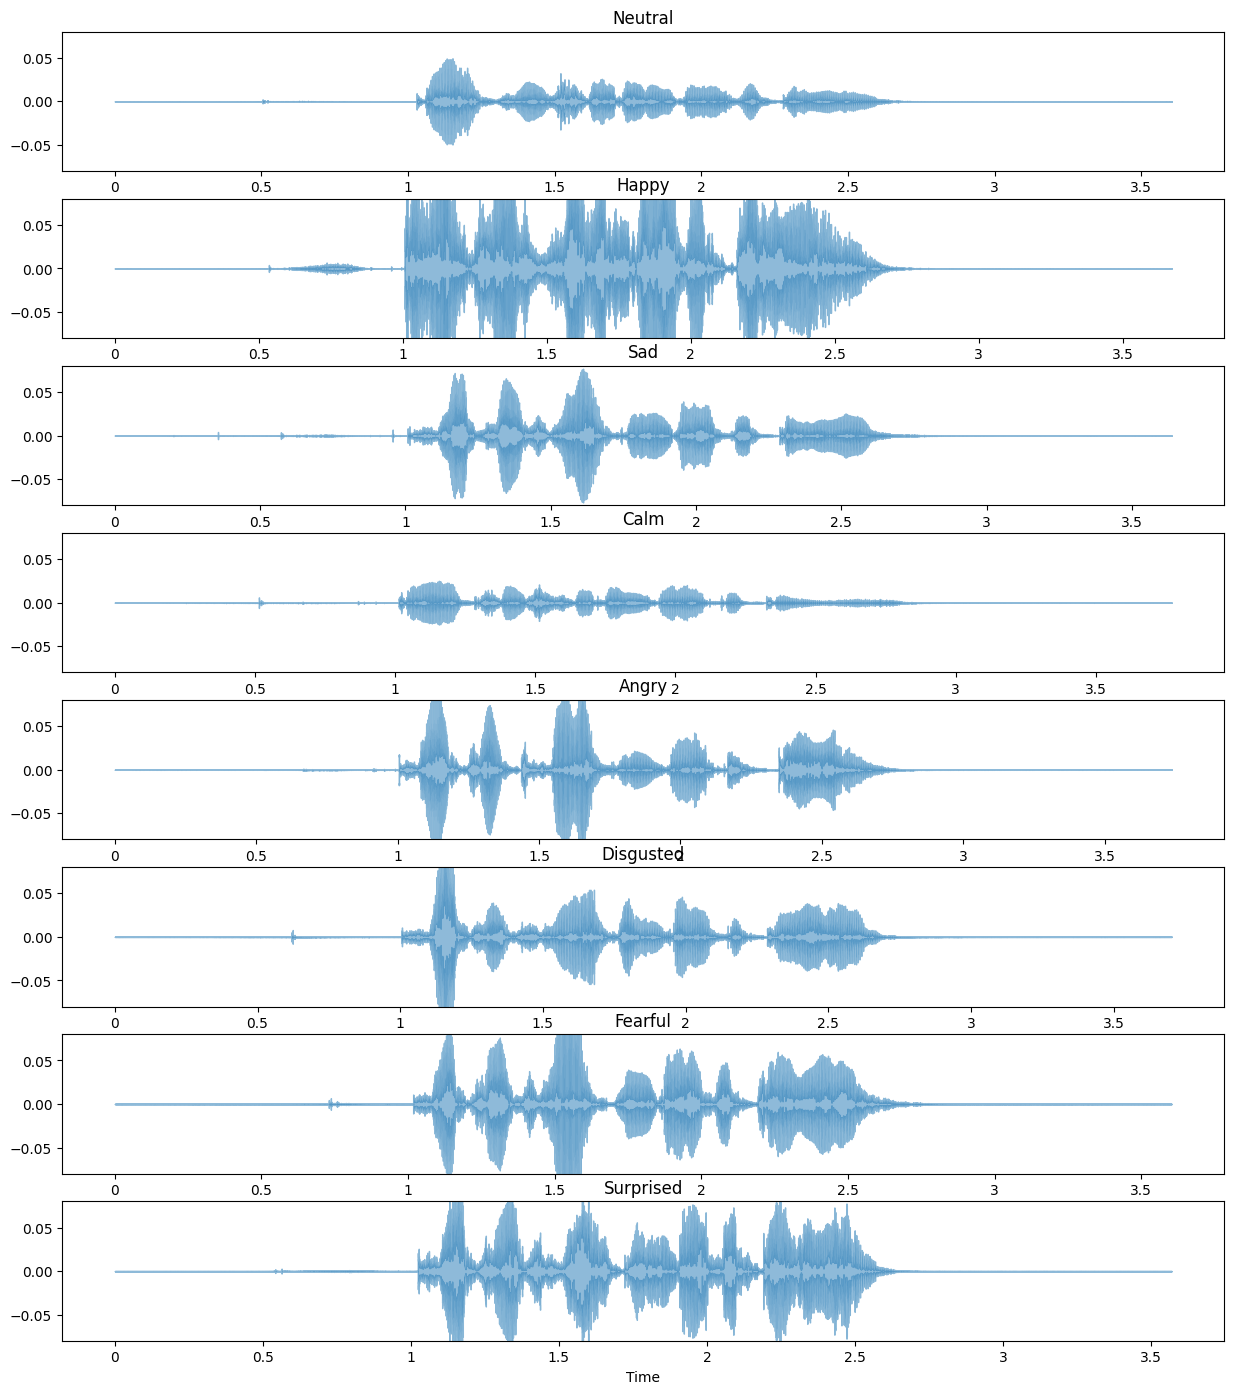

In [20]:
plt.figure(figsize=(15, 17))

plt.subplot(8, 1, 1)
librosa.display.waveshow(neutral, alpha=0.5)
plt.ylim((-0.08, 0.08))
plt.title("Neutral")

plt.subplot(8, 1, 2)
librosa.display.waveshow(happy, alpha=0.5)
plt.ylim((-0.08, 0.08))
plt.title("Happy")

plt.subplot(8, 1, 3)
librosa.display.waveshow(sad, alpha=0.5)
plt.ylim((-0.08, 0.08))
plt.title("Sad")

plt.subplot(8, 1, 4)
librosa.display.waveshow(calm, alpha=0.5)
plt.ylim((-0.08, 0.08))
plt.title("Calm")

plt.subplot(8, 1, 5)
librosa.display.waveshow(angry, alpha=0.5)
plt.ylim((-0.08, 0.08))
plt.title("Angry")

plt.subplot(8, 1, 6)
librosa.display.waveshow(disgust, alpha=0.5)
plt.ylim((-0.08, 0.08))
plt.title("Disgusted")

plt.subplot(8, 1, 7)
librosa.display.waveshow(fearful, alpha=0.5)
plt.ylim((-0.08, 0.08))
plt.title("Fearful")

plt.subplot(8, 1, 8)
librosa.display.waveshow(surprised, alpha=0.5)
plt.ylim((-0.08, 0.08))
plt.title("Surprised")

plt.show()

## Calculating amplitude envelope

In [21]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []

    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length):
        amplitude_envelope_current_frame = max(signal[i:i+frame_size])
        amplitude_envelope.append(amplitude_envelope_current_frame)

    return np.array(amplitude_envelope)

In [22]:
# number of frames in amplitude envelope
ae_neutral = amplitude_envelope(neutral, FRAME_SIZE, HOP_LENGTH)
ae_happy = amplitude_envelope(happy, FRAME_SIZE, HOP_LENGTH)
ae_sad = amplitude_envelope(sad, FRAME_SIZE, HOP_LENGTH)
ae_calm = amplitude_envelope(calm, FRAME_SIZE, HOP_LENGTH)
ae_angry = amplitude_envelope(angry, FRAME_SIZE, HOP_LENGTH)
ae_disgust = amplitude_envelope(disgust, FRAME_SIZE, HOP_LENGTH)
ae_surprised = amplitude_envelope(surprised, FRAME_SIZE, HOP_LENGTH)
ae_fearful = amplitude_envelope(fearful, FRAME_SIZE, HOP_LENGTH)
len(ae_surprised)

154

#Visualising amplitude envelope

In [23]:
frames1 = range(len(ae_neutral))
frames2 = range(len(ae_sad))
frames3 = range(len(ae_happy))
frames4 = range(len(ae_calm))
frames5 = range(len(ae_angry))
frames6 = range(len(ae_fearful))
frames7 = range(len(ae_disgust))
frames8 = range(len(ae_surprised))

t_neutral = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)
t_sad = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)
t_happy = librosa.frames_to_time(frames3, hop_length=HOP_LENGTH)
t_calm = librosa.frames_to_time(frames4, hop_length=HOP_LENGTH)
t_angry = librosa.frames_to_time(frames5, hop_length=HOP_LENGTH)
t_fearful = librosa.frames_to_time(frames6, hop_length=HOP_LENGTH)
t_disgust = librosa.frames_to_time(frames7, hop_length=HOP_LENGTH)
t_surprised = librosa.frames_to_time(frames8, hop_length=HOP_LENGTH)
t_surprised.shape

(154,)

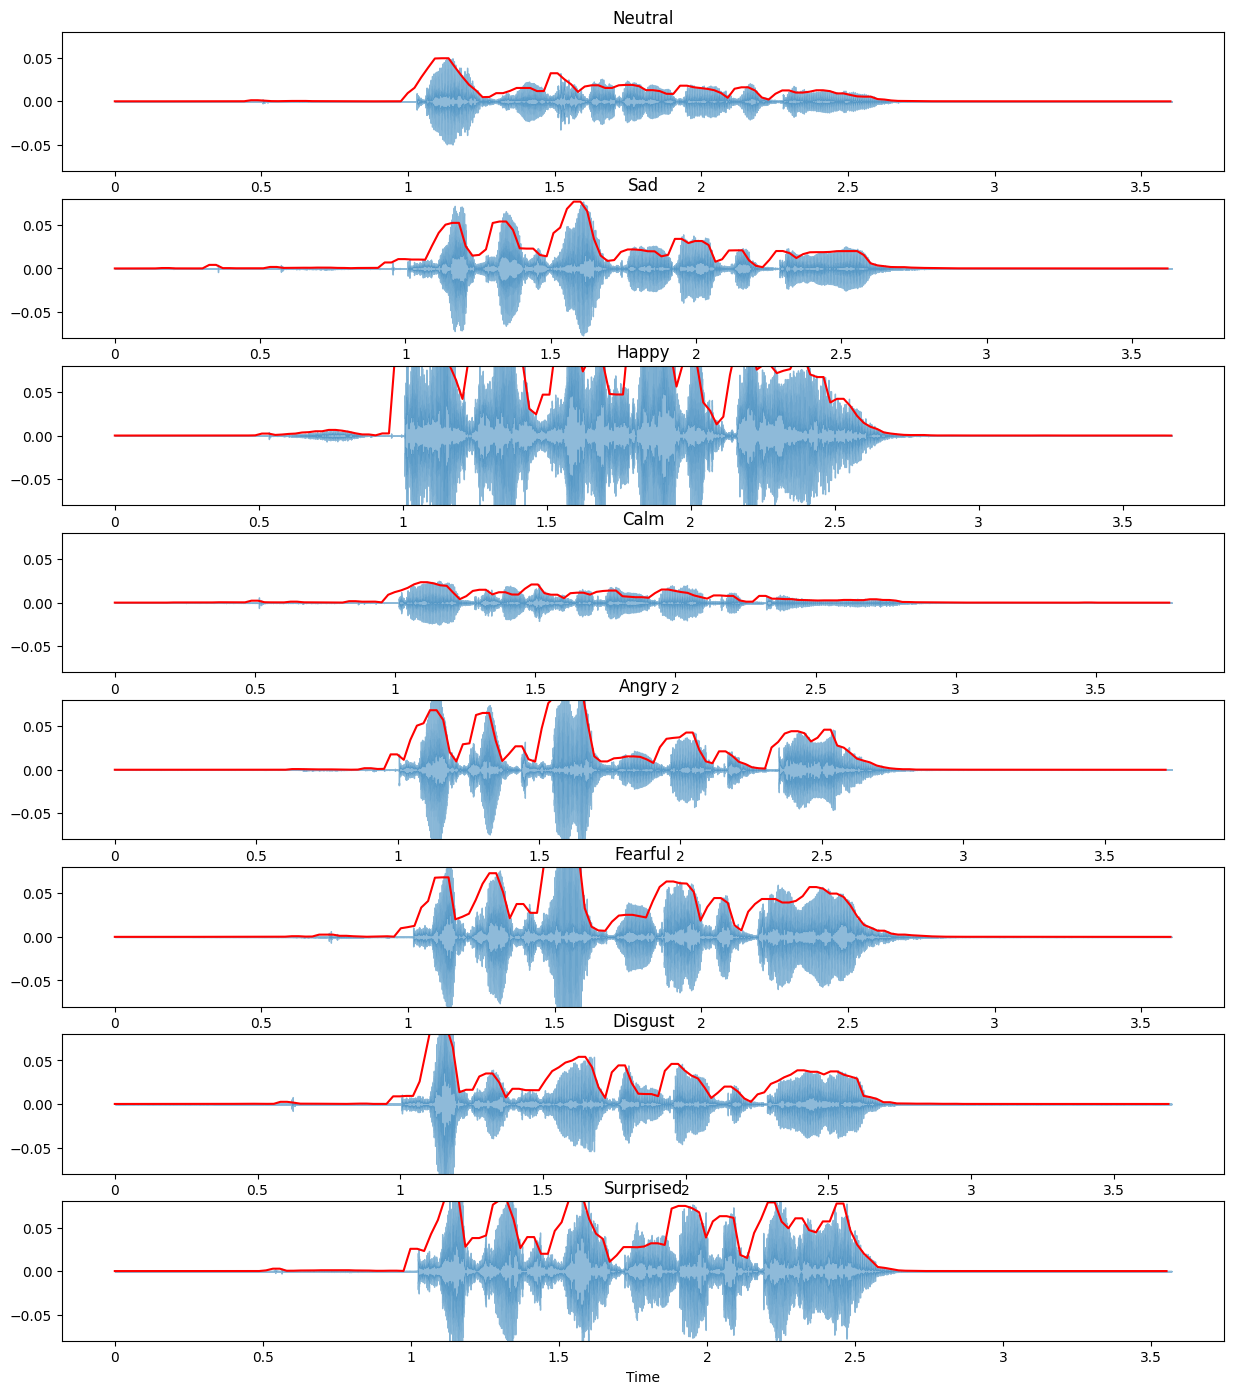

In [24]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(8, 1, 1)
librosa.display.waveshow(neutral, alpha=0.5)
plt.plot(t_neutral, ae_neutral, color="r")
plt.ylim((-0.08, 0.08))
plt.title("Neutral")

plt.subplot(8, 1, 2)
librosa.display.waveshow(sad, alpha=0.5)
plt.plot(t_sad, ae_sad, color="r")
plt.ylim((-0.08, 0.08))
plt.title("Sad")

plt.subplot(8, 1, 3)
librosa.display.waveshow(happy, alpha=0.5)
plt.plot(t_happy, ae_happy, color="r")
plt.ylim((-0.08, 0.08))
plt.title("Happy")

plt.subplot(8, 1, 4)
librosa.display.waveshow(calm, alpha=0.5)
plt.plot(t_calm, ae_calm, color="r")
plt.ylim((-0.08, 0.08))
plt.title("Calm")

plt.subplot(8, 1, 5)
librosa.display.waveshow(angry, alpha=0.5)
plt.plot(t_angry, ae_angry, color="r")
plt.ylim((-0.08, 0.08))
plt.title("Angry")

plt.subplot(8, 1, 6)
librosa.display.waveshow(fearful, alpha=0.5)
plt.plot(t_fearful, ae_fearful, color="r")
plt.ylim((-0.08, 0.08))
plt.title("Fearful")

plt.subplot(8, 1, 7)
librosa.display.waveshow(disgust, alpha=0.5)
plt.plot(t_disgust, ae_disgust, color="r")
plt.ylim((-0.08, 0.08))
plt.title("Disgust")


plt.subplot(8, 1, 8)
librosa.display.waveshow(surprised, alpha=0.5 )
plt.plot(t_surprised, ae_surprised, color="r")
plt.ylim((-0.08, 0.08))
plt.title("Surprised")

plt.show()

## Root Mean Square Energy

In [25]:
def rmse(signal, frame_size, hop_length):
    rmse = []

    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length):
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [26]:
rms_neutral = rmse(neutral, FRAME_SIZE, HOP_LENGTH)
rms_happy = rmse(happy, FRAME_SIZE, HOP_LENGTH)
rms_sad = rmse(sad, FRAME_SIZE, HOP_LENGTH)
rms_calm = rmse(calm, FRAME_SIZE, HOP_LENGTH)
rms_angry = rmse(angry, FRAME_SIZE, HOP_LENGTH)
rms_fearful = rmse(fearful, FRAME_SIZE, HOP_LENGTH)
rms_disgust = rmse(disgust, FRAME_SIZE, HOP_LENGTH)
rms_surprised = rmse(surprised, FRAME_SIZE, HOP_LENGTH)
rms_calm.shape

(163,)

## Visualizing RMS Energy

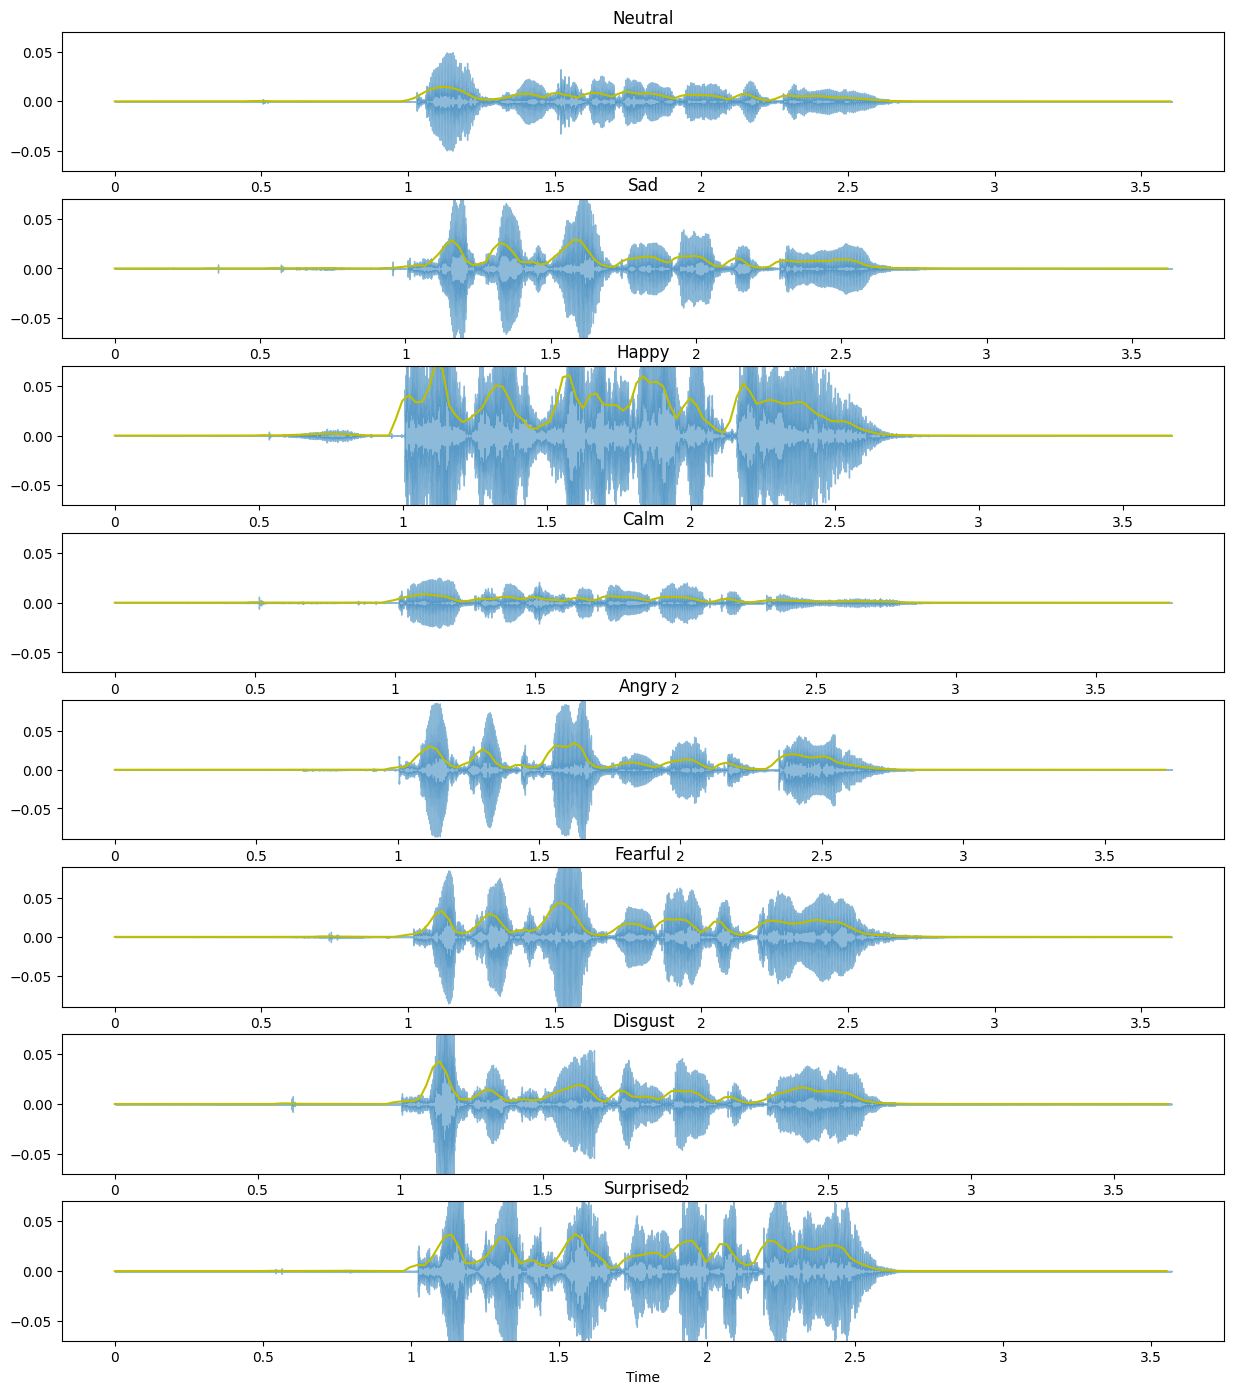

In [27]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(8, 1, 1)
librosa.display.waveshow(neutral, alpha=0.5)
plt.plot(t_neutral, rms_neutral, color="y")
plt.ylim((-0.07, 0.07))
plt.title("Neutral")

plt.subplot(8, 1, 2)
librosa.display.waveshow(sad, alpha=0.5)
plt.plot(t_sad, rms_sad, color="y")
plt.ylim((-0.07, 0.07))
plt.title("Sad")

plt.subplot(8, 1, 3)
librosa.display.waveshow(happy, alpha=0.5)
plt.plot(t_happy, rms_happy, color="y")
plt.ylim((-0.07, 0.07))
plt.title("Happy")

plt.subplot(8, 1, 4)
librosa.display.waveshow(calm, alpha=0.5)
plt.plot(t_calm, rms_calm, color="y")
plt.ylim((-0.07, 0.07))
plt.title("Calm")

plt.subplot(8, 1, 5)
librosa.display.waveshow(angry, alpha=0.5)
plt.plot(t_angry, rms_angry, color="y")
plt.ylim((-0.09, 0.09))
plt.title("Angry")

plt.subplot(8, 1, 6)
librosa.display.waveshow(fearful, alpha=0.5)
plt.plot(t_fearful, rms_fearful, color="y")
plt.ylim((-0.09, 0.09))
plt.title("Fearful")

plt.subplot(8, 1, 7)
librosa.display.waveshow(disgust, alpha=0.5)
plt.plot(t_disgust, rms_disgust, color="y")
plt.ylim((-0.07, 0.07))
plt.title("Disgust")


plt.subplot(8, 1, 8)
librosa.display.waveshow(surprised, alpha=0.5 )
plt.plot(t_surprised, rms_surprised, color="y")
plt.ylim((-0.07, 0.07))
plt.title("Surprised")

plt.show()

## Zero Crossing Rate

In [28]:
zcr_neutral = librosa.feature.zero_crossing_rate(neutral, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_sad = librosa.feature.zero_crossing_rate(sad, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_happy = librosa.feature.zero_crossing_rate(happy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_calm = librosa.feature.zero_crossing_rate(calm, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_angry = librosa.feature.zero_crossing_rate(angry, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_fearful = librosa.feature.zero_crossing_rate(fearful, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_disgust = librosa.feature.zero_crossing_rate(disgust, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_surprised= librosa.feature.zero_crossing_rate(surprised, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_fearful.shape


(156,)

## Visualise zero-crossing rate with Librosa

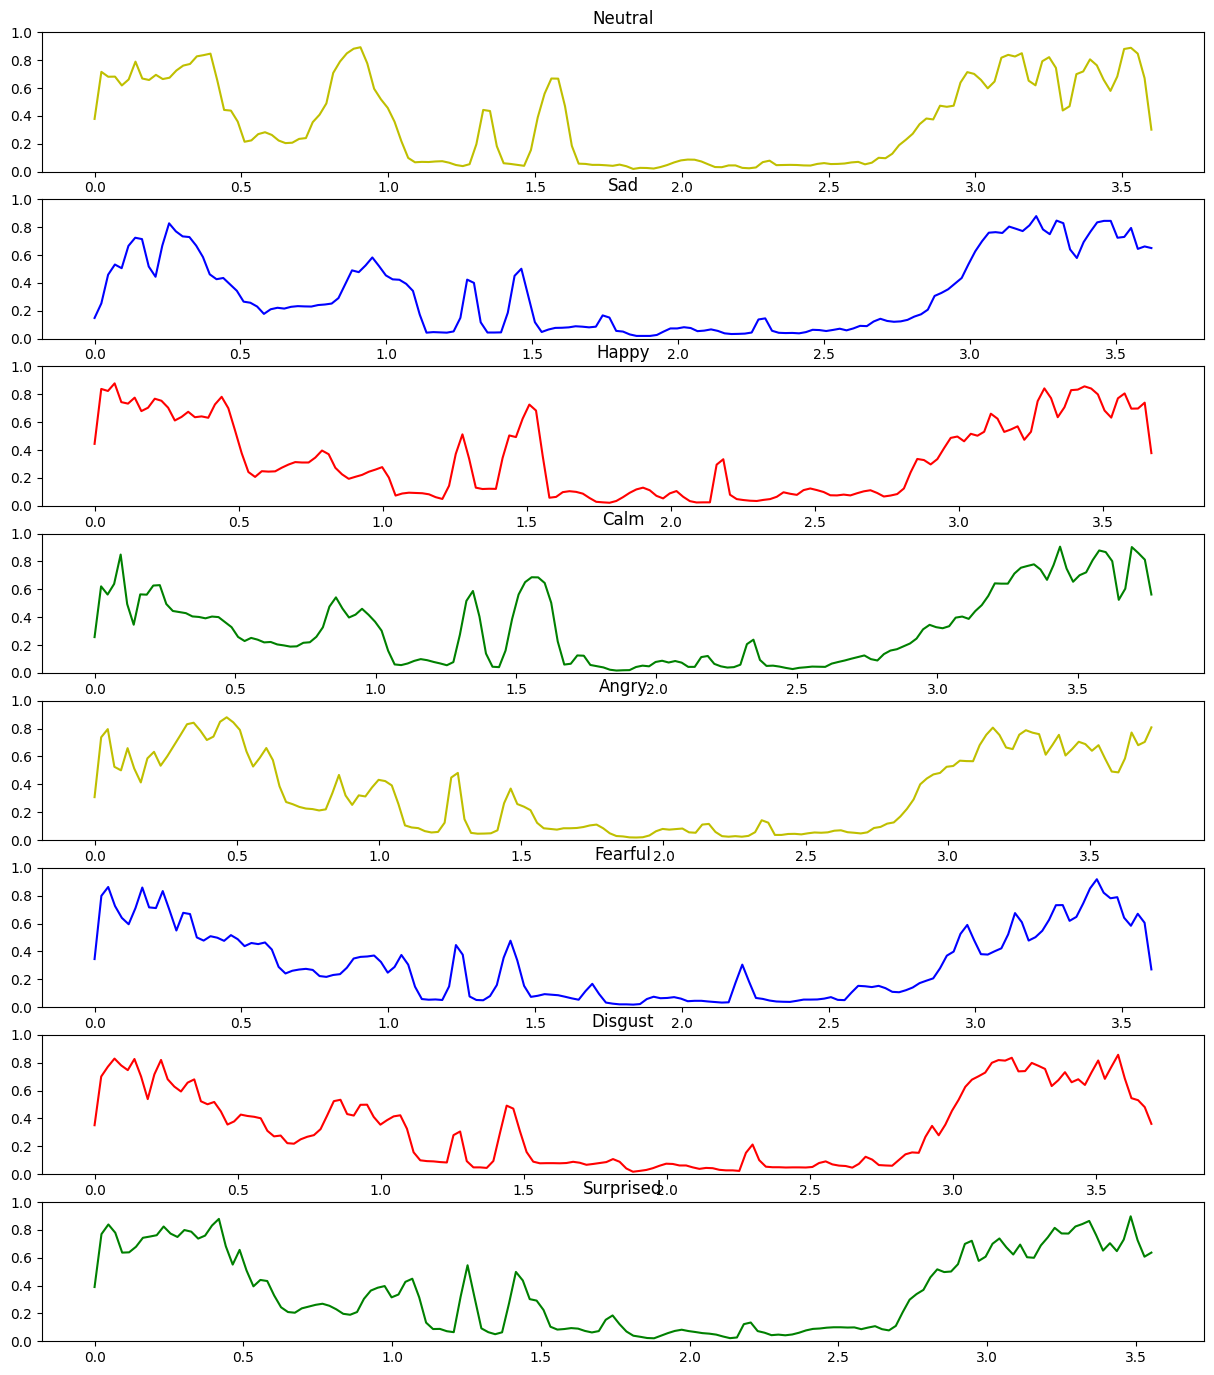

In [29]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(8, 1, 1)
plt.plot(t_neutral, zcr_neutral, color="y")
plt.ylim((0,1))
plt.title("Neutral")

plt.subplot(8, 1, 2)
plt.plot(t_sad, zcr_sad, color="b")
plt.ylim(0, 1)
plt.title("Sad")

plt.subplot(8, 1, 3)
plt.plot(t_happy, zcr_happy, color="r")
plt.ylim(0, 1)
plt.title("Happy")

plt.subplot(8, 1, 4)
plt.plot(t_calm, zcr_calm, color="g")
plt.ylim(0, 1)
plt.title("Calm")

plt.subplot(8, 1, 5)
plt.plot(t_angry, zcr_angry, color="y")
plt.ylim(0, 1)
plt.title("Angry")

plt.subplot(8, 1, 6)
plt.plot(t_fearful, zcr_fearful, color="b")
plt.ylim(0, 1)
plt.title("Fearful")

plt.subplot(8, 1, 7)
plt.plot(t_disgust, zcr_disgust, color="r")
plt.ylim(0, 1)
plt.title("Disgust")


plt.subplot(8, 1, 8)
plt.plot(t_surprised, zcr_surprised, color="g")
plt.ylim(0, 1)
plt.title("Surprised")

plt.show()

In [30]:
zcr_surprised

array([0.38964844, 0.76953125, 0.83886719, 0.77929688, 0.63671875,
       0.63867188, 0.67871094, 0.74316406, 0.75195312, 0.76171875,
       0.82421875, 0.7734375 , 0.74902344, 0.79882812, 0.78710938,
       0.73730469, 0.75878906, 0.83105469, 0.87890625, 0.68261719,
       0.55078125, 0.65625   , 0.50878906, 0.39453125, 0.44042969,
       0.43261719, 0.32910156, 0.24414062, 0.20996094, 0.20507812,
       0.23632812, 0.24902344, 0.26171875, 0.26953125, 0.25488281,
       0.22949219, 0.19726562, 0.19042969, 0.20996094, 0.3046875 ,
       0.36425781, 0.38476562, 0.39648438, 0.31542969, 0.3359375 ,
       0.42675781, 0.44921875, 0.31542969, 0.13378906, 0.08789062,
       0.08886719, 0.07226562, 0.06542969, 0.32128906, 0.54589844,
       0.31738281, 0.09277344, 0.06542969, 0.05078125, 0.06445312,
       0.27148438, 0.49804688, 0.43652344, 0.30273438, 0.29199219,
       0.22460938, 0.10449219, 0.08398438, 0.08789062, 0.09472656,
       0.09082031, 0.07421875, 0.06347656, 0.07324219, 0.15429

## Now finding AE, RMSE, ZCR for all the entries.

In [ ]:
df

In [ ]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

# ---------- Feature Functions ----------
def amplitude_envelope(signal, frame_size, hop_length):
    ae = []
    for i in range(0, len(signal), hop_length):
        ae.append(np.max(np.abs(signal[i:i+frame_size])))
    return np.array(ae)

def rmse(signal, frame_size, hop_length):
    rms = []
    for i in range(0, len(signal), hop_length):
        frame = signal[i:i+frame_size]
        rms.append(np.sqrt(np.mean(frame**2)))
    return np.array(rms)

def zcr(signal, frame_size, hop_length):
    return librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=hop_length)[0]

# ---------- Constants ----------
FRAME_SIZE = 1024
HOP_LENGTH = 512


# ---------- Feature Extraction ----------
ae_list = []
rmse_list = []
zcr_list = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    filepath = row['filepath']

    try:
        signal, sr = librosa.load(filepath, sr=None)
        ae = amplitude_envelope(signal, FRAME_SIZE, HOP_LENGTH)
        rms = rmse(signal, FRAME_SIZE, HOP_LENGTH)
        zcr_vals = zcr(signal, FRAME_SIZE, HOP_LENGTH)

        ae_list.append(ae)
        rmse_list.append(rms)
        zcr_list.append(zcr_vals)

    except Exception as e:
        print(f" Error processing {filepath}: {e}")
        ae_list.append(np.nan)
        rmse_list.append(np.nan)
        zcr_list.append(np.nan)

# ---------- Append Columns ----------
df["AE"] = ae_list
df["RMSE"] = rmse_list
df["ZCR"] = zcr_list

# ---------- Save the updated dataset ----------
df.to_csv("Temporalmean-features.csv", index=False)


In [ ]:
df

In [ ]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

# ---------- Feature Functions ----------
def amplitude_envelope(signal, frame_size, hop_length):
    ae = []
    for i in range(0, len(signal), hop_length):
        ae.append(np.max(np.abs(signal[i:i+frame_size])))
    return np.array(ae)

def rmse(signal, frame_size, hop_length):
    rms = []
    for i in range(0, len(signal), hop_length):
        frame = signal[i:i+frame_size]
        rms.append(np.sqrt(np.mean(frame**2)))
    return np.array(rms)

def zcr(signal, frame_size, hop_length):
    return librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=hop_length)[0]

# ---------- Constants ----------
FRAME_SIZE = 1024
HOP_LENGTH = 512

# ---------- Initialize lists ----------
ae_mean_list = []
rmse_mean_list = []
zcr_mean_list = []

# ---------- Feature Extraction ----------
for idx, row in tqdm(df.iterrows(), total=len(df)):
    filepath = row['filepath']

    try:
        signal, sr = librosa.load(filepath, sr=None)

        ae = amplitude_envelope(signal, FRAME_SIZE, HOP_LENGTH)
        rms = rmse(signal, FRAME_SIZE, HOP_LENGTH)
        zcr_vals = zcr(signal, FRAME_SIZE, HOP_LENGTH)

        ae_mean = np.mean(ae)
        rmse_mean = np.mean(rms)
        zcr_mean = np.mean(zcr_vals)

        # Append to lists
        ae_mean_list.append(ae_mean)
        rmse_mean_list.append(rmse_mean)
        zcr_mean_list.append(zcr_mean)

        # Check for NaNs and print status
        if not any(np.isnan([ae_mean, rmse_mean, zcr_mean])):
            print(f" Correctly appended for: {filepath}")
        else:
            print(f" Warning: NaN value encountered in means for {filepath}")

    except Exception as e:
        print(f" Error processing {filepath}: {e}")
        ae_mean_list.append(np.nan)
        rmse_mean_list.append(np.nan)
        zcr_mean_list.append(np.nan)

# ---------- Append Mean Columns ----------
df["AE_mean"] = ae_mean_list
df["RMSE_mean"] = rmse_mean_list
df["ZCR_mean"] = zcr_mean_list




In [ ]:
# ---------- Save the updated dataset ----------
df.to_csv("Temporalmean-features.csv", index=False)